# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [38]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [39]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

city_data = []

for city in cities:
    query_url = url + "&q=" + city
    print(query_url)
    
    try:
        weather = requests.get(query_url).json()
        latitude = weather["coord"]["lat"]
        longitude = weather["coord"]["lon"]
        windspeed = weather["wind"]["speed"]
        temp = weather["main"]["temp"]
        country = weather["sys"]["country"]
        humidity = weather["main"]["humidity"]
        clouds = weather["clouds"]["all"]
        
        city_data.append({"Latitude":latitude,
                        "Longitude":longitude,
                        "Windspeed":windspeed,
                        "Temperature":temp,
                        "Country":country,
                        "Humidity":humidity,
                        "Cloudiness":clouds})
    except:
        pass

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=east london
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=gari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=bengkulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=arraial do cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=samarai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=saleaula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=manacapuru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=ha giang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=utiroa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=hashtgerd
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=jilin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=guerrero negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=kahului
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=kindu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=fernandina beach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=nurota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=washington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=roshchino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=puerto ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=bambous virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=strezhevoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff84

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=carballo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=surat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=vieques
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=sioux lookout
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=toora-khem
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=palauig
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=alamogordo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=hovd
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=f

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=rivera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=nizhniy odes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=haibowan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=mogadishu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=grand river south east
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=northam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=acapulco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=ribeira grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186def

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=pekalongan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=clearlake
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=okhotsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=dubbo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=itaguai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=san policarpo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=clifton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=coahuayana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=swansea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=san cristobal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=najran
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=doka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=tabialan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=tual
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=amga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=viligili
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=alofi
http:

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=pattoki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=codrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=bull savanna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=limbang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=mandal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=tateyama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=hualmay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=trat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=vila

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=ketchikan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=sidi ali
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=ust-tsilma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=sisimiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=novyy urengoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=laguna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=gat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=masuguru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [40]:
city_data_df = pd.DataFrame(city_data)
print(city_data_df)
save_data=city_data_df.to_csv('./cities.csv')
save_data

     Cloudiness Country  Humidity  Latitude  Longitude  Temperature  Windspeed
0            90      ZA        88    -33.02      27.91        62.60      10.29
1            36      RU        91     59.43      62.35        28.25       5.95
2            92      BR        95    -22.97     -42.02        73.52      16.02
3            75      ET        71      8.96      38.73        55.40       3.36
4            92      PG       100    -10.62     150.67        78.47      14.67
5            20      BR        57     -3.30     -60.62        83.60       7.18
6            75      MY        75      6.35     116.43        91.40       6.93
7            88      BR        96    -20.63     -46.00        65.60       1.92
8             8      AU        84    -33.64     115.35        68.30       4.83
9             0      AU        49    -33.21     138.60        63.53      11.43
10           40      CL        74    -53.16     -70.91        37.40      18.34
11           20      GF        98      5.38     -52.

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

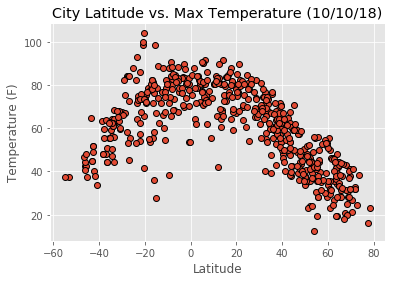

In [41]:
plt.scatter(city_data_df['Latitude'], city_data_df['Temperature'], edgecolor="black", linewidths=1, marker="o")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("LatVsTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

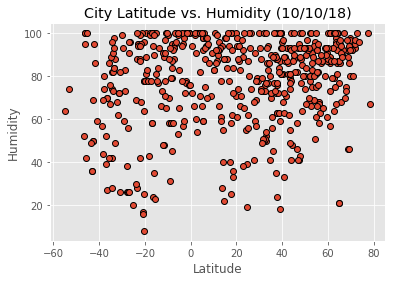

In [42]:
plt.scatter(city_data_df['Latitude'], city_data_df['Humidity'], edgecolor="black", linewidths=1, marker="o")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("LatVsHum.png")
plt.show()

#### Latitude vs. Cloudiness Plot

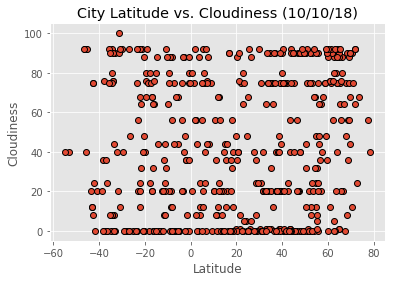

In [43]:
plt.scatter(city_data_df['Latitude'], city_data_df['Cloudiness'], edgecolor="black", linewidths=1, marker="o")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("LatVsCloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

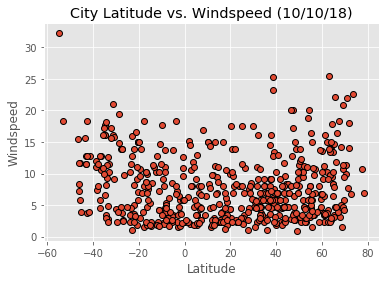

In [44]:
plt.scatter(city_data_df['Latitude'], city_data_df['Windspeed'], edgecolor="black", linewidths=1, marker="o")
plt.title("City Latitude vs. Windspeed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Windspeed")
plt.savefig("LatVsWind.png")
plt.show()